<a href="https://colab.research.google.com/github/myazann/Lung_Cancer/blob/main/Lung_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf sample_data
!rm sample.py
!rm README.md
!pip install pydicom

import pandas as pd
import json
import os
import random
import numpy as np
import cv2
from PIL import Image

In [ ]:
!cp ./drive/MyDrive/bboxs.json .
!cp ./drive/MyDrive/lung_ct_train.zip .
!cp ./drive/MyDrive/lung_ct_val.zip .

!unzip lung_ct_train.zip > /dev/null
!rm lung_ct_train.zip
!unzip lung_ct_val.zip > /dev/null
!rm lung_ct_val.zip

with open('bboxs.json') as json_file:
  bboxs = json.load(json_file)

## Get images and labels into np arrays.


In [46]:
train_imgs = []
val_imgs = []

train_labels = []
val_labels = []

for ptnt in os.listdir("lung_ct_train"):
  for img in os.listdir("lung_ct_train/" + ptnt):
    fp = "lung_ct_train/" + ptnt + "/" + img

    im = cv2.imread(fp)
    im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

    train_imgs.append(im)
    train_labels.append(bboxs[img.split(".j")[0]])

for ptnt in os.listdir("lung_ct_val"):
  for img in os.listdir("lung_ct_val/" + ptnt):
    fp = "lung_ct_val/" + ptnt + "/" + img

    im = cv2.imread(fp)
    im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

    val_imgs.append(im)
    val_labels.append(bboxs[img.split(".j")[0]])

train_imgs = np.array(train_imgs)
val_imgs = np.array(val_imgs)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

##Function to visualize an image with its corresponding label

In [57]:
def get_img_with_bbox(im, labels):

  xmax = int(labels["xmax"])
  xmin = int(labels["xmin"])
  ymax = int(labels["ymax"])
  ymin = int(labels["ymin"])

  im = cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (255,255,255), 2)

  display(Image.fromarray(im))

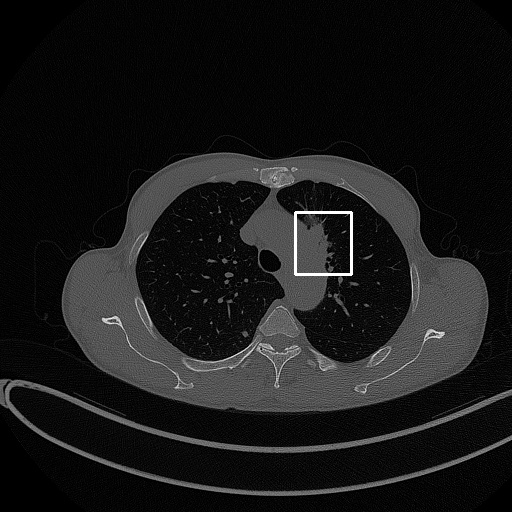

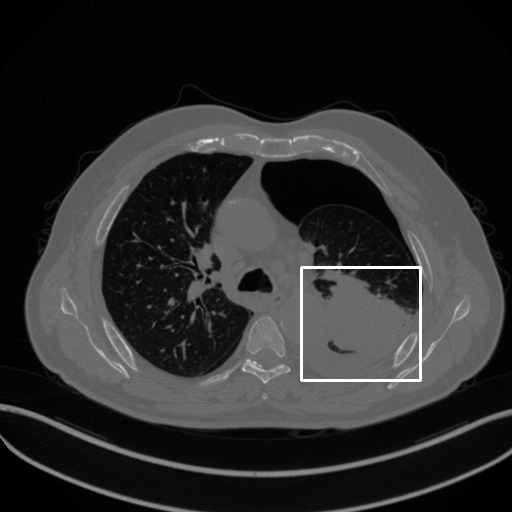

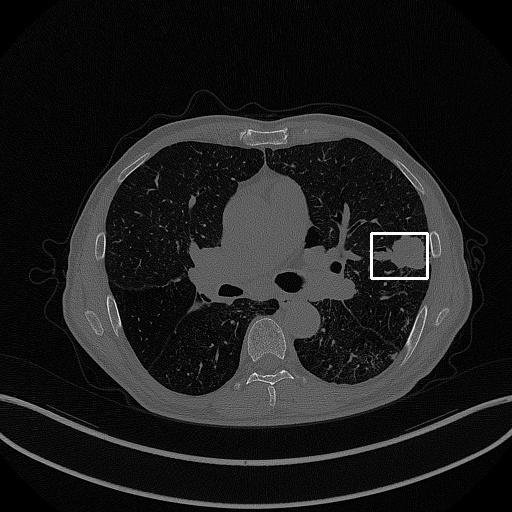

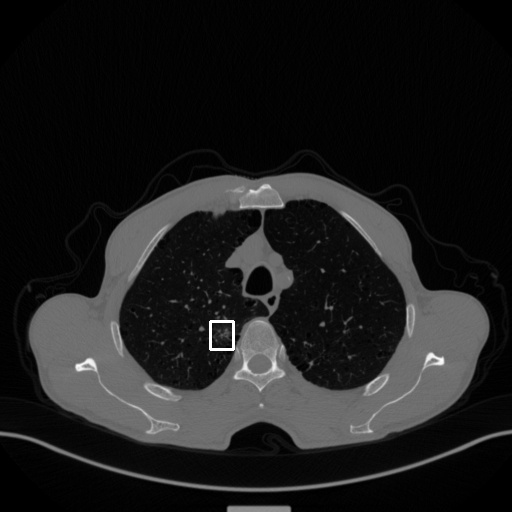

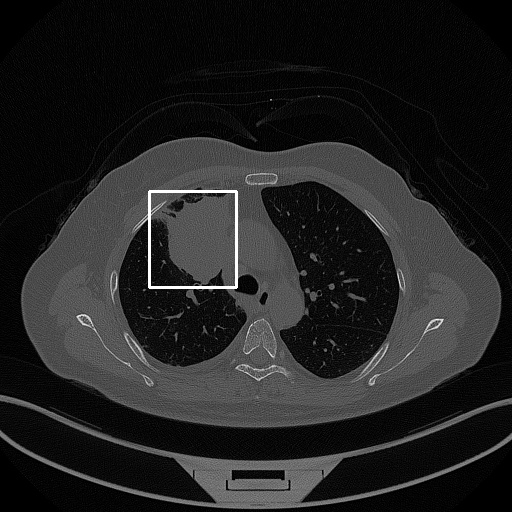

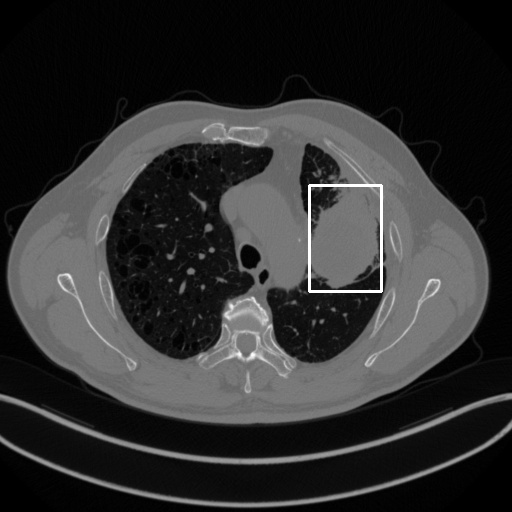

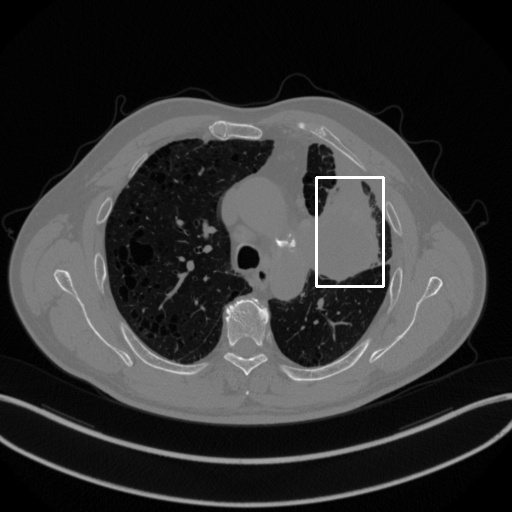

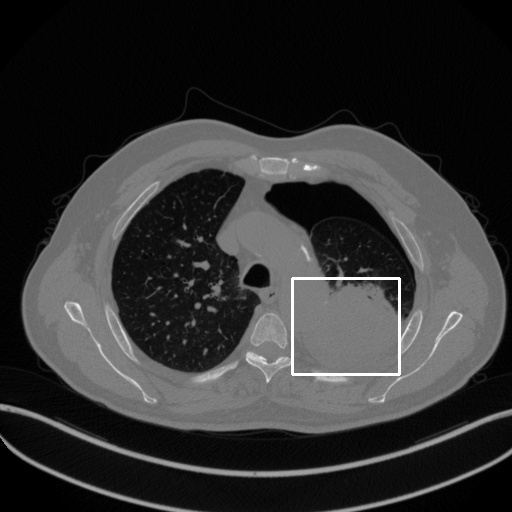

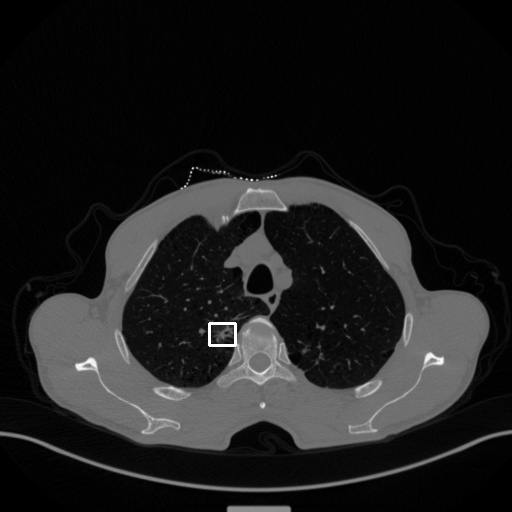

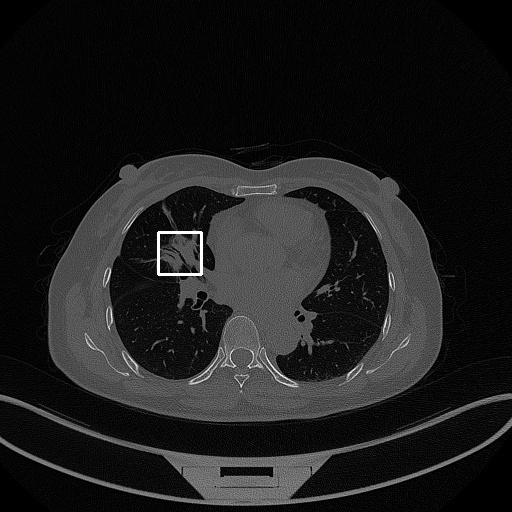

In [64]:
rs = random.sample(range(0, len(train_labels)), 10)

for elem in rs:
  get_img_with_bbox(train_imgs[elem], train_labels[elem])
  print("\n")